In [1]:
X = open('./two_X_new.txt','r',encoding = 'utf8').readlines()
Y = open('./two_Y_new.txt','r',encoding = 'utf8').readlines()
for i in range(len(X)):
    X[i] = X[i].strip('\n')
    Y[i] = Y[i].strip('\n')

In [2]:
from collections import Counter

In [2]:
from gensim.models import word2vec
sentences = word2vec.Text8Corpus('two_X_new.txt')
model = word2vec.Word2Vec(sentences,size = 50,window = 4 ,min_count = 3)
#model.wv.save_word2vec_format('two.zh.text.vector',binary =False)

c:\python3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
X_max = []
Y_max = []
for i in range(len(X)):
    matrix = []
    misnum = 0
    for word in X[i].split():
        try:
            matrix.append(model[word].tolist())
        except:
            misnum += 1
    max_list = []
    for j in range(len(matrix[0])):  
        one_list=[]  
        for k in range(len(matrix)):  
            one_list.append(matrix[k][j])  
        max_list.append(max(one_list))
    X_max.append(max_list)

c:\python3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
label = LabelEncoder()
Y_num = label.fit_transform(Y)
X_train,X_test,Y_train,Y_test = train_test_split(X_max,Y_num,test_size = 0.2)

In [6]:
from sklearn.svm import SVC
import numpy as np
clf = SVC()
clf.fit(X_train,Y_train)
y_pre = clf.predict(X_test)
result = np.mean(y_pre==Y_test)
result

0.4791639953840236

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pre = clf.predict(X_test)
result = np.mean(y_pre == Y_test)
result

0.5948198486985511

In [8]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(np.array(X_train),Y_train)
y_pre = clf.predict(X_test)
result = np.mean(y_pre == Y_test)
result

c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7277856135401974

In [12]:
from xgboost import XGBClassifier
import matplotlib as plt
from sklearn.model_selection import cross_val_score #交叉验证
xg_params = [3,5,7,9,11]
xg_test_scores = []
for param in xg_params:
    clf = XGBClassifier(max_depth=param)
    test_score = -cross_val_score(clf, np.array(X_max),Y_num, cv=10)
    xg_test_scores.append(np.mean(test_score))
plt.plot(xg_params, xg_test_scores)
plt.title("Xgboost平均偏差")

c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size >

c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size >

AttributeError: module 'matplotlib' has no attribute 'plot'

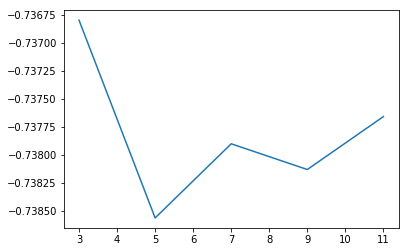

In [16]:
import matplotlib.pyplot as plt
plt.plot(xg_params,xg_test_scores)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)# coding:utf-8
y_pred = classifier.predict(X_test)
p = np.mean(y_pred == Y_test)

In [18]:
p

0.5153224772406719

In [5]:
1 + 1

2